In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set("talk","ticks",font_scale=1,font="sans-serif",color_codes=True)
import statsmodels.api as sm
from pylab import rcParams
plt.rcParams["figure.dpi"] = 300
import scipy.stats as stats
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
df = pd.read_csv(r"C:\Users\Tshepo\Desktop\MLAgortihms\Datasets\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
x = df[["Pregnancies","Glucose","BloodPressure","BMI","DiabetesPedigreeFunction"]]
y = df.iloc[::,-1]
x_constant = sm.add_constant(x)
model = sm.Logit(y,x_constant).fit()
model.predict(x_constant)
model.summary()

Optimization terminated successfully.
         Current function value: 0.474323
         Iterations 6


C:\Users\Tshepo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      762
Method:                           MLE   Df Model:                            5
Date:                Thu, 16 Jul 2020   Pseudo R-squ.:                  0.2667
Time:                        13:53:38   Log-Likelihood:                -364.28
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 3.442e-55
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -7.9550      0.676    -11.771      0.000      -9.280      -6.630
Pregnancies                  0.1535      0.028      5.514      0.000       0.099       0.208
Glucose                      0.0347      0.003     10.213      0.000       0.028       0.041
BloodPressure               -0.0120      0.005     -2.387      0.017      -0.022      -0.002
BMI                          0.0848      0.014      6.006      0.000       0.057       0.113
DiabetesPedigreeFunction     0.9106      0.294      3.097      0.002       0.334       1.487
============================================================================================
"""

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [4]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

C:\Users\Tshepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
RBM = BernoulliRBM()
classifier = Pipeline(steps=[("rbm",RBM),("logreg",logreg)])
classifier.fit(x_train,y_train)

C:\Users\Tshepo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('rbm',
                 BernoulliRBM(batch_size=10, learning_rate=0.1,
                              n_components=256, n_iter=10, random_state=None,
                              verbose=0)),
                ('logreg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [6]:
y_predRBM = classifier.predict(x_test)
pd.DataFrame({"Predicted": y_predRBM, "Actual": y_test})

,Predicted,Actual
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
476,0,1
482,0,0
230,1,1
527,0,0


In [7]:
classificationRBM = pd.DataFrame(metrics.classification_report(y_test, y_predRBM, output_dict=True)).transpose()
classificationRBM

,precision,recall,f1-score,support
0,0.895349,0.719626,0.797927,107.000000
1,0.558824,0.808511,0.660870,47.000000
accuracy,0.746753,0.746753,0.746753,0.746753
macro avg,0.727086,0.764068,0.729399,154.000000
weighted avg,0.792643,0.746753,0.756098,154.000000


In [8]:
cmatRBM = pd.DataFrame(metrics.confusion_matrix(y_test,y_predRBM), columns = ["Predicted: No", "Predicted: Yes"], index = ["Actual: No", "Actual: Yes"])
cmatRBM

,Predicted: No,Predicted: Yes
Actual: No,77,30
Actual: Yes,9,38


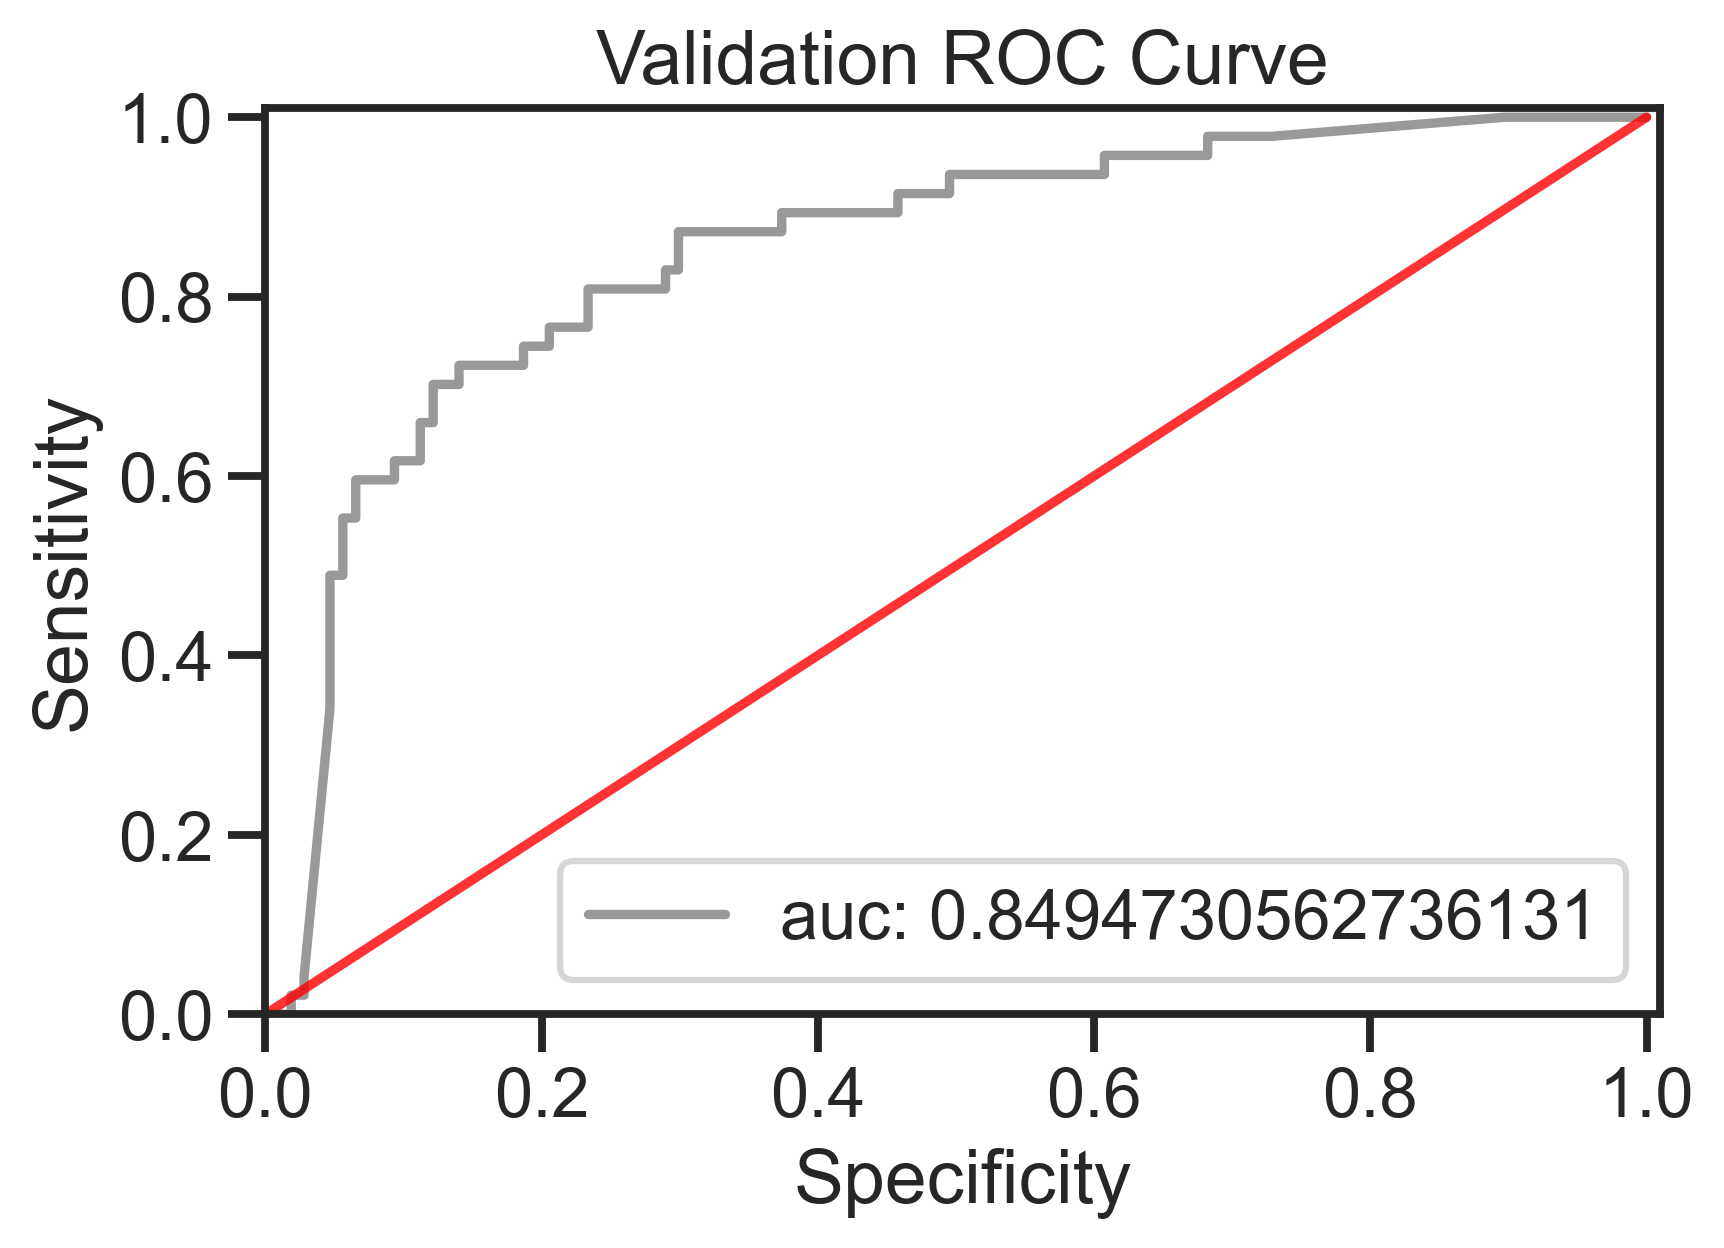

In [12]:
y_predlogreg_probaRBM = classifier.predict_proba(x_test)[::,1]
fprRBM, tprRBM, _ = metrics.roc_curve(y_test,y_predlogreg_probaRBM)
aucRBM = metrics.roc_auc_score(y_test,y_predlogreg_probaRBM)
plt.plot(fprRBM, tprRBM,label="auc: " + str(aucRBM),color="gray",alpha=0.8)
plt.plot([0,1], [0,1],color="red",alpha=0.8)
plt.xlim([0.00,1.01])
plt.ylim([0.00,1.01])
plt.title("Validation ROC Curve")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")
plt.legend(loc=4)
plt.show()

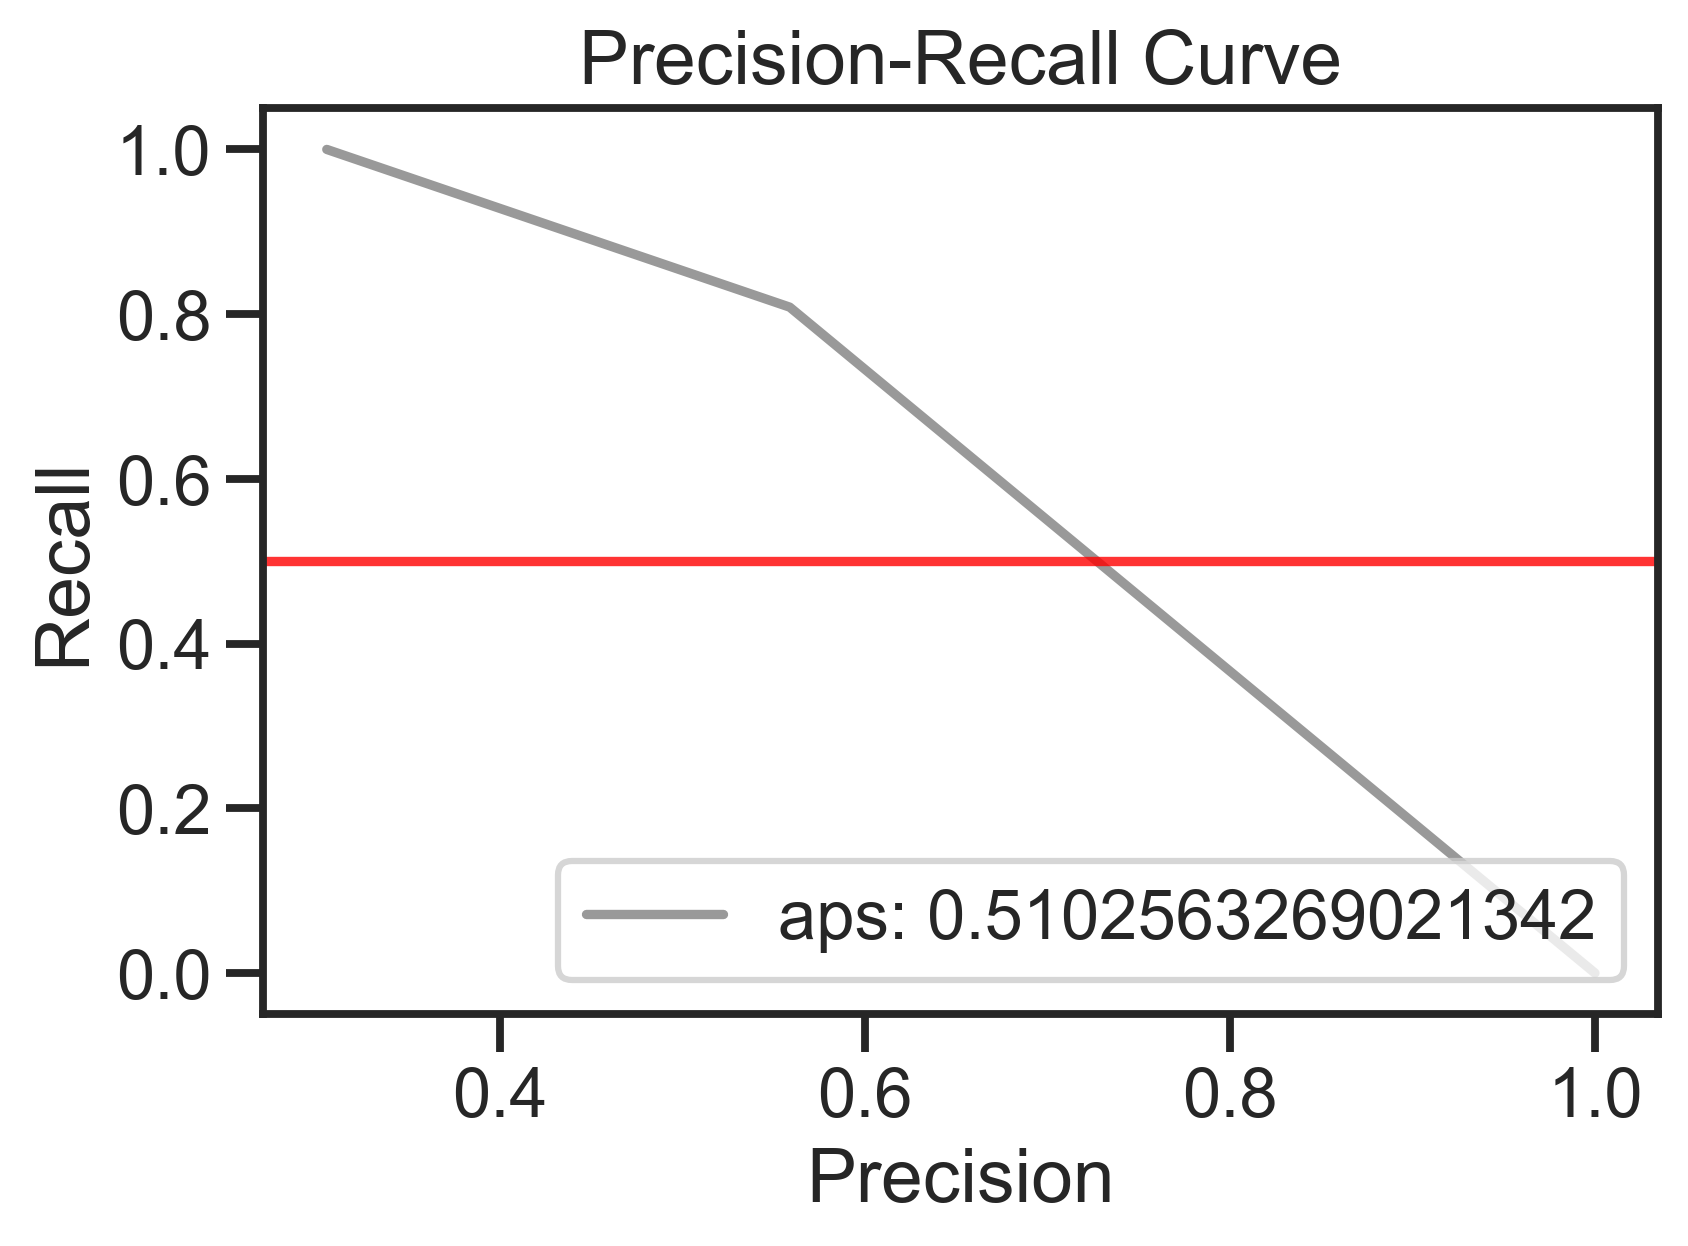

In [14]:
precisionRBM, recallRBM, thresholdRBM = metrics.precision_recall_curve(y_test,y_predRBM)
apsRBM = metrics.average_precision_score(y_test,y_predRBM)
plt.plot(precisionRBM, recallRBM,label="aps: " + str(apsRBM), color="gray", alpha=0.8)
plt.axhline(y=0.5,color="red",alpha=0.8)
plt.title("Precision-Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc=4)
plt.show()

In [15]:
from sklearn.neural_network import MLPClassifier

In [16]:
MLP = MLPClassifier()
MLP.fit(x_train,y_train)

C:\Users\Tshepo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [17]:
y_predMLP = classifier.predict(x_test)
pd.DataFrame({"Actual":y_test, "Predicted":y_predMLP})

,Actual,Predicted
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
476,1,0
482,0,0
230,1,1
527,0,0


In [18]:
classificationMLP = pd.DataFrame(metrics.classification_report(y_test, y_predMLP, output_dict=True)).transpose()
classificationMLP

,precision,recall,f1-score,support
0,0.895349,0.719626,0.797927,107.000000
1,0.558824,0.808511,0.660870,47.000000
accuracy,0.746753,0.746753,0.746753,0.746753
macro avg,0.727086,0.764068,0.729399,154.000000
weighted avg,0.792643,0.746753,0.756098,154.000000


In [19]:
cmatMLP = pd.DataFrame(metrics.confusion_matrix(y_test,y_predMLP), columns = ["Predicted: No", "Predicted: Yes"], index = ["Actual: No", "Actual: Yes"])
cmatMLP

,Predicted: No,Predicted: Yes
Actual: No,77,30
Actual: Yes,9,38


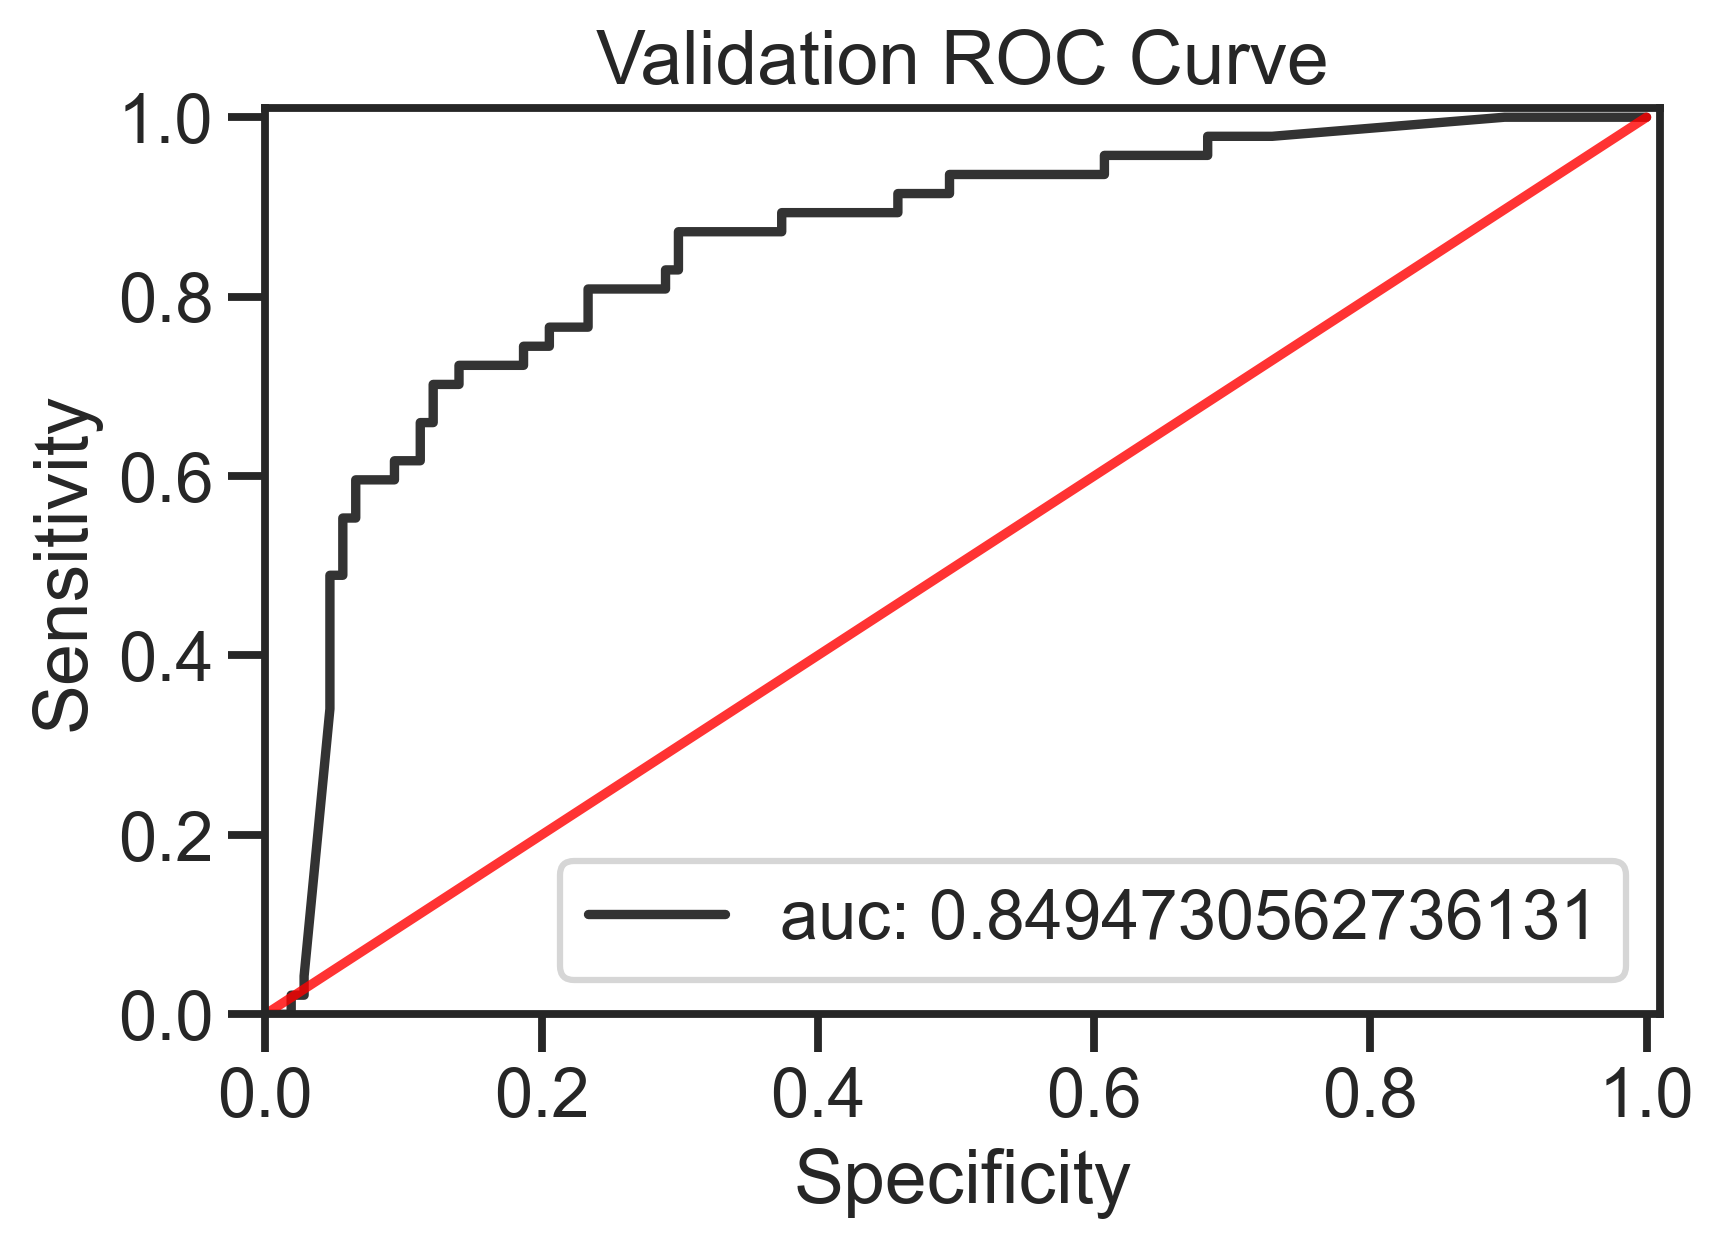

In [20]:
y_predlogreg_probaMLP = classifier.predict_proba(x_test)[::,1]
fprMLP, tprMLP, _ = metrics.roc_curve(y_test,y_predlogreg_probaMLP)
aucMLP = metrics.roc_auc_score(y_test,y_predlogreg_probaMLP)
plt.plot(fprMLP, tprMLP,label="auc: " + str(aucMLP),color="black",alpha=0.8)
plt.plot([0,1], [0,1],color="red",alpha=0.8)
plt.xlim([0.00,1.01])
plt.ylim([0.00,1.01])
plt.title("Validation ROC Curve")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")
plt.legend(loc=4)
plt.show()


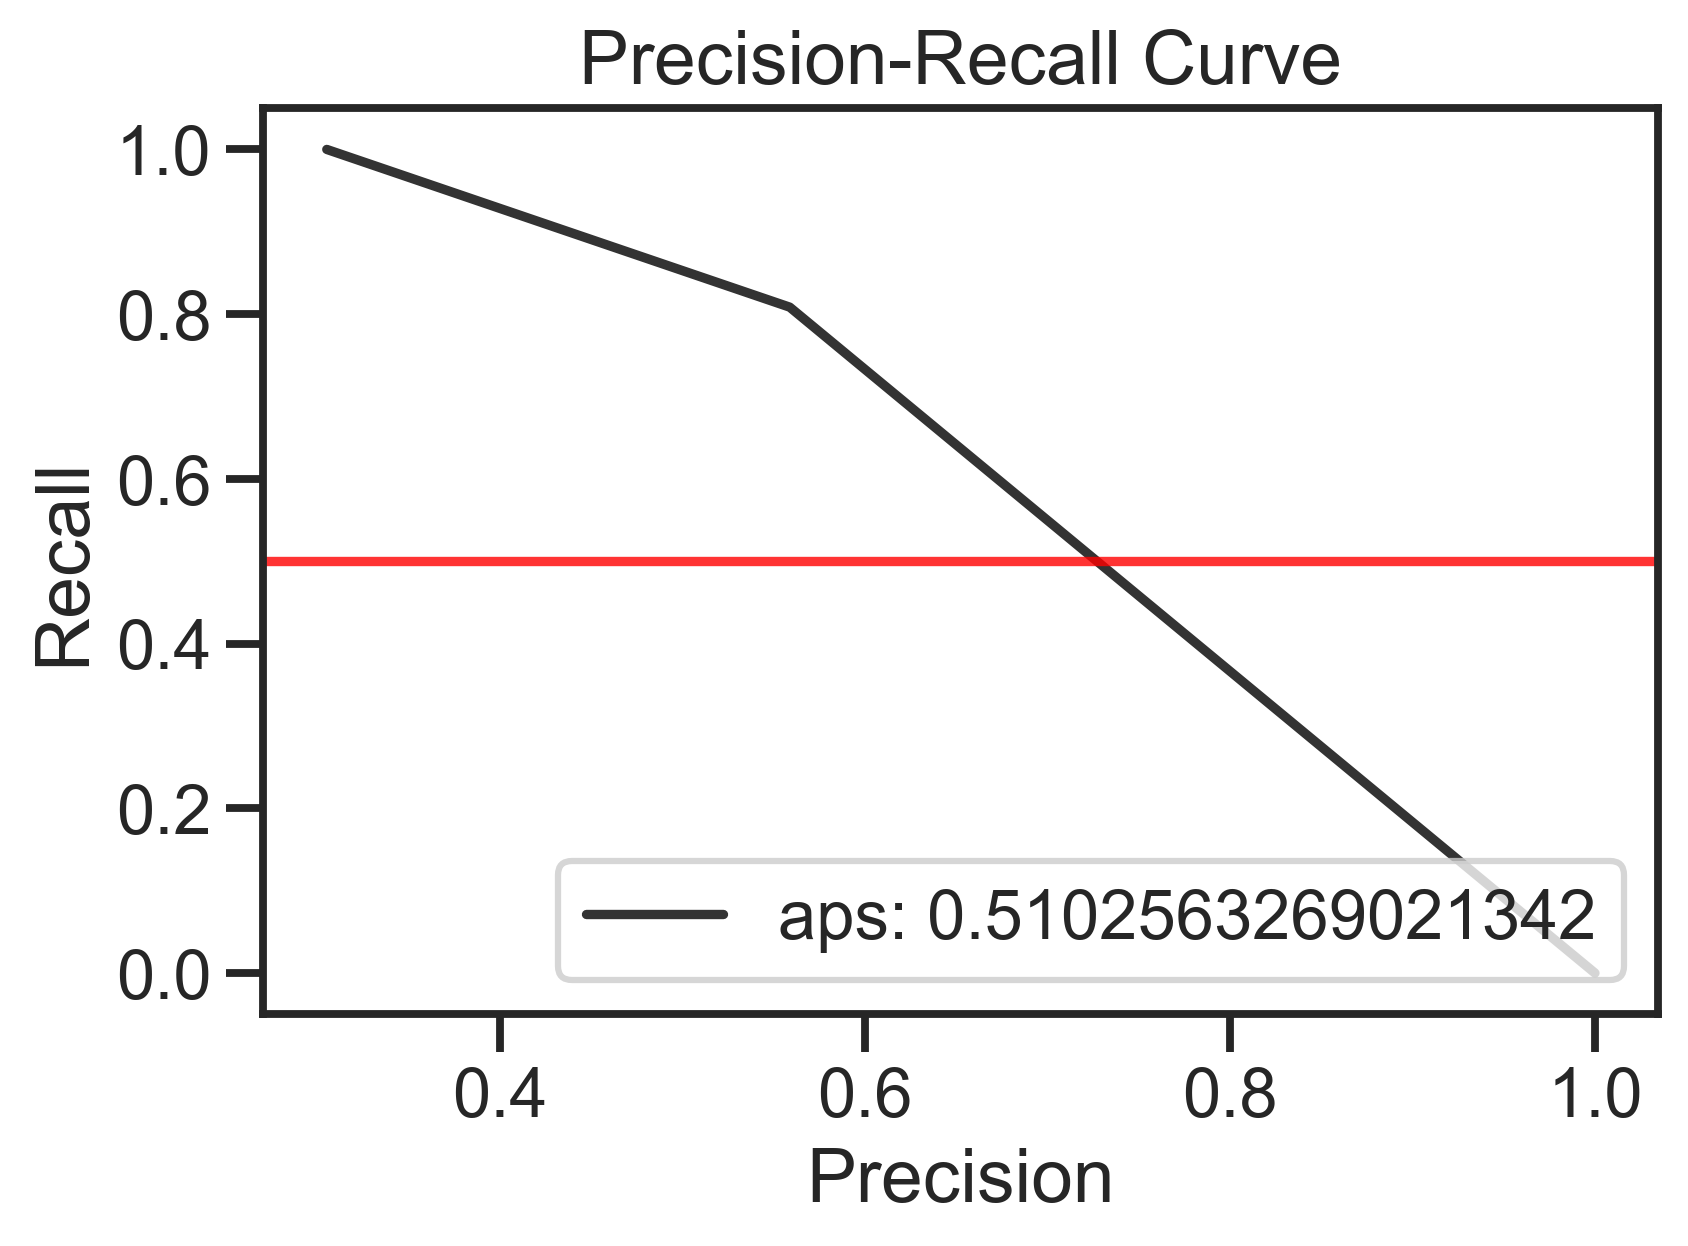

In [21]:
precisionMLP, recallMLP, thresholdMLP = metrics.precision_recall_curve(y_test,y_predMLP)
apsMLP = metrics.average_precision_score(y_test,y_predMLP)
plt.plot(precisionMLP, recallMLP,label="aps: " +str(apsMLP),color="black",alpha=0.8)
plt.axhline(y=0.5,color="red",alpha=0.8)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc=4)
plt.title("Precision-Recall Curve")
plt.show()


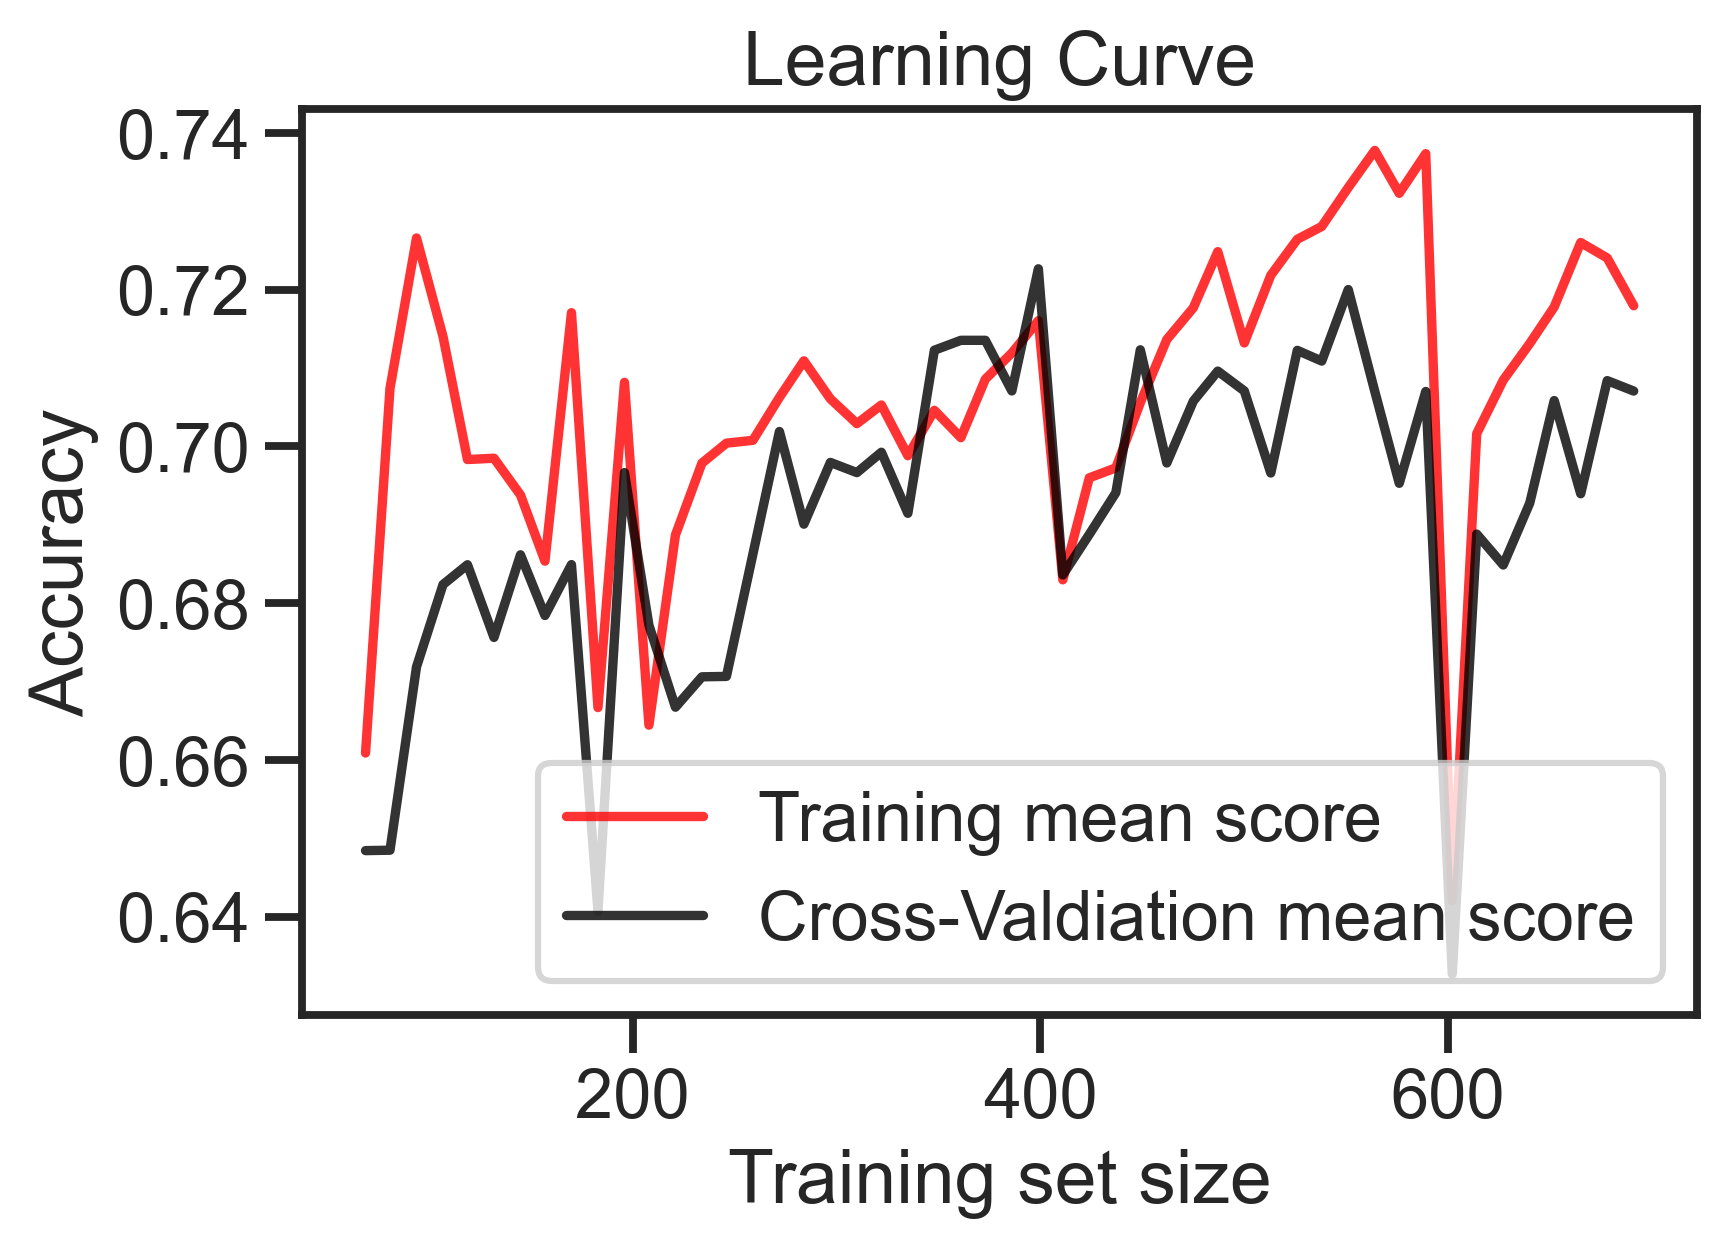

In [23]:
from sklearn.model_selection import learning_curve
trainsize, trainscore, testscore = learning_curve(MLPClassifier(),x,y,cv=10, n_jobs=-1, scoring="accuracy", train_sizes=np.linspace(0.1,1.0,50))
trainscore_mean = np.mean(trainscore,axis=1)
trainscore_std = np.std(trainscore,axis=1)
testscore_mean = np.mean(testscore,axis=1)
testscore_std = np.std(testscore,axis=1)
plt.plot(trainsize,trainscore_mean,color="red", alpha=0.8, label="Training mean score")
plt.plot(trainsize,testscore_mean,color="black", alpha=0.8, label="Cross-Valdiation mean score")
plt.legend(loc=4)
plt.title("Learning Curve")
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.show()